In [21]:
import pandas as pd
df = pd.read_csv('Dados/covid.csv', sep=',')

# **Tratamento de dados**

In [22]:
# Renomeando colunas
nomes = {
    'USMER': 'usmr', 
    'MEDICAL_UNIT': 'unidade_medica',
    'SEX': 'sexo', 
    'PATIENT_TYPE': 'tipo_paciente', 
    'DATE_DIED': 'data_obito', 
    'INTUBED': 'intubado',
    'PNEUMONIA': 'pneumonia', 
    'AGE': 'idade', 
    'PREGNANT': 'gravidez', 
    'DIABETES': 'diabetes', 
    'COPD': 'doenca_pulmonar_obstrutiva', 
    'ASTHMA': 'asma', 
    'INMSUPR': 'imunossuprimido',
    'HIPERTENSION': 'hipertensao', 
    'OTHER_DISEASE': 'outras_doencas', 
    'CARDIOVASCULAR': 'doenca_cardiovascular', 
    'OBESITY': 'obesidade',
    'RENAL_CHRONIC': 'doenca_renal_cronica', 
    'TOBACCO': 'fumante', 
    'CLASIFFICATION_FINAL': 'teste_covid', 
    'ICU':'uti'
}

df = df.rename(columns=nomes)

display(df.head(5))


# Renomeando features
# Como faremos apenas análise semântica (explanatória), podemos substituir as categorias numéricas por strings e facilitar a visualização

categoria_bool = {
    1: 'Sim',
    2: 'Não',
    97: 'Não registrado',
    98: 'Não registrado',
    99: 'Não registrado'
}

categoria_sexo = {
    1: 'Mulher',
    2: 'Homem'
}

categoria_paciente = {
    1: 'Retornou para casa',
    2: 'Hospitalizado'
}

categoria_teste_covid = {
    1: 'Paciente diagnosticado',
    2: 'Paciente diagnosticado',
    3: 'Paciente diagnosticado',
    4: 'Não contaminado/Teste inconclusivo',
    5: 'Não contaminado/Teste inconclusivo',
    6: 'Não contaminado/Teste inconclusivo',
    7: 'Não contaminado/Teste inconclusivo'
}

datas = {
    '9999-99-99': '01/01/1900' # Substitui o padrão de data de não óbito por um modelo que facilita a correção de tipagem
}

bool_cols = ['intubado', 'pneumonia', 
             'gravidez', 'diabetes', 
             'doenca_pulmonar_obstrutiva', 
             'asma', 'imunossuprimido', 
             'hipertensao','outras_doencas', 
             'doenca_cardiovascular', 
             'obesidade','doenca_renal_cronica', 
             'fumante', 'uti']
df[bool_cols] = df[bool_cols].replace(categoria_bool)
df['sexo'] = df['sexo'].replace(categoria_sexo)
df['tipo_paciente'] = df['tipo_paciente'].replace(categoria_paciente)
df['teste_covid'] = df['teste_covid'].replace(categoria_teste_covid)
df['data_obito'] = df['data_obito'].replace(datas)


# Tipagem de dados
df['data_obito'] = pd.to_datetime(df['data_obito'], format='%d/%m/%Y')

# Criando uma coluna de ID
df['id_paciente'] = df.index.astype(str) + '_' + df['sexo']


display(df.head(5))
display(df.info())


,usmr,unidade_medica,sexo,tipo_paciente,data_obito,intubado,pneumonia,idade,gravidez,diabetes,...,asma,imunossuprimido,hipertensao,outras_doencas,doenca_cardiovascular,obesidade,doenca_renal_cronica,fumante,teste_covid,uti
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


,usmr,unidade_medica,sexo,tipo_paciente,data_obito,intubado,pneumonia,idade,gravidez,diabetes,...,imunossuprimido,hipertensao,outras_doencas,doenca_cardiovascular,obesidade,doenca_renal_cronica,fumante,teste_covid,uti,id_paciente
0,2,1,Mulher,Retornou para casa,2020-05-03,Não registrado,Sim,65,Não,Não,...,Não,Sim,Não,Não,Não,Não,Não,Paciente diagnosticado,Não registrado,0_Mulher
1,2,1,Homem,Retornou para casa,2020-06-03,Não registrado,Sim,72,Não registrado,Não,...,Não,Sim,Não,Não,Sim,Sim,Não,Não contaminado/Teste inconclusivo,Não registrado,1_Homem
2,2,1,Homem,Hospitalizado,2020-06-09,Sim,Não,55,Não registrado,Sim,...,Não,Não,Não,Não,Não,Não,Não,Paciente diagnosticado,Não,2_Homem
3,2,1,Mulher,Retornou para casa,2020-06-12,Não registrado,Não,53,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,Não contaminado/Teste inconclusivo,Não registrado,3_Mulher
4,2,1,Homem,Retornou para casa,2020-06-21,Não registrado,Não,68,Não registrado,Sim,...,Não,Sim,Não,Não,Não,Não,Não,Paciente diagnosticado,Não registrado,4_Homem


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   usmr                        1048575 non-null  int64         
 1   unidade_medica              1048575 non-null  int64         
 2   sexo                        1048575 non-null  object        
 3   tipo_paciente               1048575 non-null  object        
 4   data_obito                  1048575 non-null  datetime64[ns]
 5   intubado                    1048575 non-null  object        
 6   pneumonia                   1048575 non-null  object        
 7   idade                       1048575 non-null  int64         
 8   gravidez                    1048575 non-null  object        
 9   diabetes                    1048575 non-null  object        
 10  doenca_pulmonar_obstrutiva  1048575 non-null  object        
 11  asma                    

None


# **Integridade dos dados**
- Há homens com registro de gravidez? Os "não registrado" em gravidez são todos homens?


In [23]:
mask_h = (df['sexo'] == 'Homem') & ((df['gravidez'] == 'Sim') | (df['gravidez'] == 'Não'))
mask_m = (df['sexo'] == 'Mulher') & (df['gravidez'] == 'Não registrado')

print(f'Homens com registro de gravidez: {df[mask_h].shape[0]}')
print('\n')
print(f'Muheres com "Não registrado": {df[mask_m].shape[0]}')

Homens com registro de gravidez: 0


Muheres com "Não registrado": 3754


Não há homens com registro "Sim" ou "Não" para gravidez.

Podemos usar uma nomenclatura que não remeta a um missing value, para a coluna de gravidez nos registros referentes a homens.

In [24]:
categoria_gravidez = {
    'Não registrado': 
}

SyntaxError: expression expected after dictionary key and ':' (1169843936.py, line 2)

**a. Como deu-se a evolução dos óbitos? Foi linear ou tivemos períodos de picos e controles?**

,usmr,unidade_medica,sexo,tipo_paciente,data_obito,intubado,pneumonia,idade,gravidez,diabetes,...,outras_doencas,doenca_cardiovascular,obesidade,doenca_renal_cronica,fumante,teste_covid,uti,id_paciente,ano_obito,mes_obito
0,2,1,Mulher,Retornou para casa,2020-05-03,Não registrado,Sim,65,Não,Não,...,Não,Não,Não,Não,Não,Paciente diagnosticado,Não registrado,0_Mulher,2020,5
1,2,1,Homem,Retornou para casa,2020-06-03,Não registrado,Sim,72,Não registrado,Não,...,Não,Não,Sim,Sim,Não,Não contaminado/Teste inconclusivo,Não registrado,1_Homem,2020,6
2,2,1,Homem,Hospitalizado,2020-06-09,Sim,Não,55,Não registrado,Sim,...,Não,Não,Não,Não,Não,Paciente diagnosticado,Não,2_Homem,2020,6


id_paciente
ano_obito mes_obito             
2020      1                  368
          2                  437
          3                  552
          4                 6926
          5                21314
          6                25278
          7                20457
          8                 1134
          9                   91
          10                  27
          11                  18
          12                  23
2021      1                   31
          2                   35
          3                   32
          4                  170
          5                   49

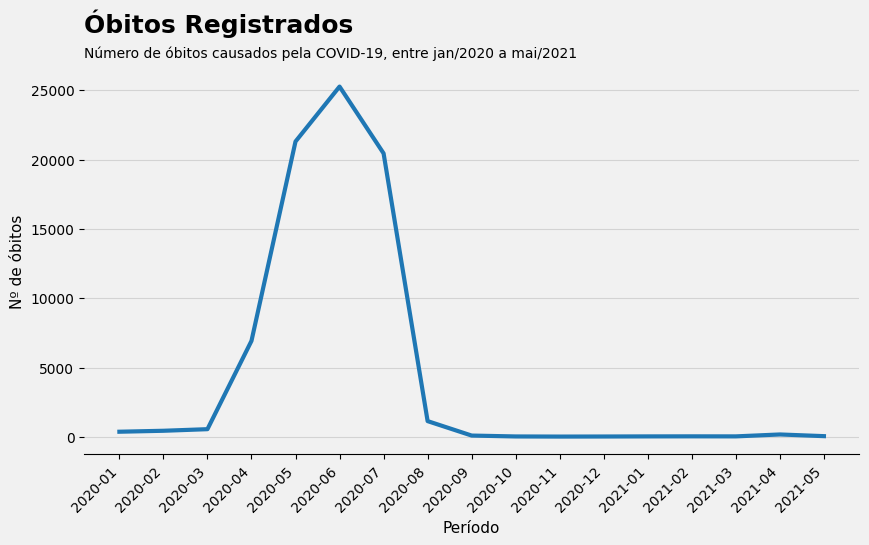

In [38]:
df['ano_obito'] = df['data_obito'].dt.year
df['mes_obito'] = df['data_obito'].dt.month
display(df.head(3))

mask_data = df['data_obito'] != '1900-01-01'
grupo_evo_obt = df[['id_paciente', 'ano_obito', 'mes_obito']][mask_data].groupby(by=['ano_obito', 'mes_obito']).count()
display(grupo_evo_obt)

import matplotlib.pyplot as plt

# Reseta os índices para garantir a ordem temporal (o gráfico não plota sem isso)
grupo_evo_obt = grupo_evo_obt.reset_index()

# A função zip agrupa cada posição das colunas ano_obito e mes_obito em um par. Cada ano e mês é inserido em um posição da lista, resultando em uma lista ano-mes
periodo = [f"{ano}-{mes:02d}" for ano, mes in zip(grupo_evo_obt['ano_obito'], grupo_evo_obt['mes_obito'])]

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10,5), facecolor='#F1F1F1')

ax.plot(periodo, grupo_evo_obt['id_paciente'], linewidth=3)

ax.set_title('Óbitos Registrados\n', loc='left', fontweight='bold', fontsize=18)
ax.set_facecolor('#F1F1F1')

ax.text(0,1.03,'Número de óbitos causados pela COVID-19, entre jan/2020 a mai/2021',transform=ax.transAxes)

ax.set_xlabel('Período', fontsize=11)
ax.set_ylabel('Nº de óbitos', fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y', color='lightgrey')

# Rotaciona as labels do eixo X
plt.xticks(rotation=45, ha='right')

# ax.set_xticks(rotation=45, ha='right') - Não funciona

plt.show()